# Lab 2

### 1. Image Preprocessing

- **Algorithm**: Convert a high-resolution photograph to grayscale.
- **Accuracy**: Simplifies the image for analysis while retaining key information.
- **Visualization**: Display the original and grayscale images.

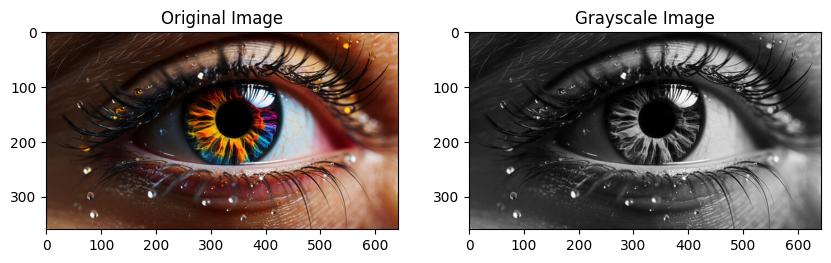

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a high-resolution color image
image = cv2.imread('eye.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
grayscale_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.subplot(1, 2, 2)
plt.title('Grayscale Image')
plt.imshow(grayscale_image, cmap='gray')
plt.show()


### 2. Image Sampling

- **Algorithm**: Downsample the grayscale image using nearest-neighbor interpolation.
- **Accuracy**: Maintains pixel integrity during downsampling.
- **Visualization**: Display images at different resolutions.

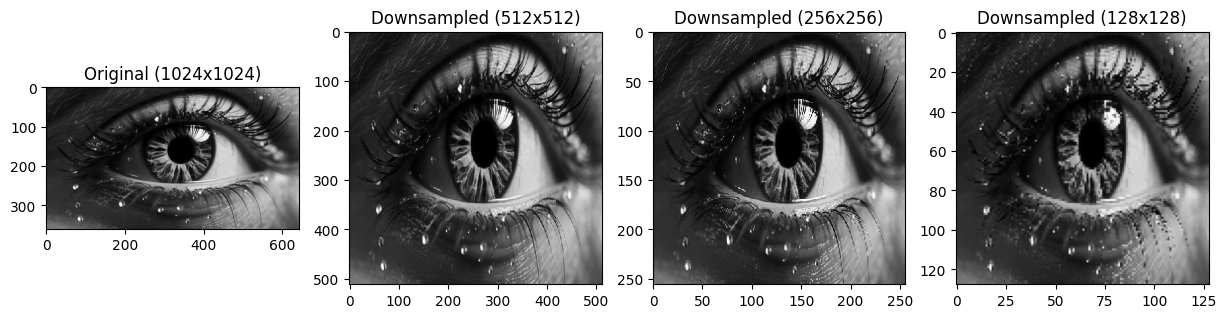

In [2]:
# Downsample images to different resolutions using nearest-neighbor interpolation
downsampled_512 = cv2.resize(grayscale_image, (512, 512), interpolation=cv2.INTER_NEAREST)
downsampled_256 = cv2.resize(grayscale_image, (256, 256), interpolation=cv2.INTER_NEAREST)
downsampled_128 = cv2.resize(grayscale_image, (128, 128), interpolation=cv2.INTER_NEAREST)

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original (1024x1024)')
plt.imshow(grayscale_image, cmap='gray')
plt.subplot(1, 4, 2)
plt.title('Downsampled (512x512)')
plt.imshow(downsampled_512, cmap='gray')
plt.subplot(1, 4, 3)
plt.title('Downsampled (256x256)')
plt.imshow(downsampled_256, cmap='gray')
plt.subplot(1, 4, 4)
plt.title('Downsampled (128x128)')
plt.imshow(downsampled_128, cmap='gray')
plt.show()


### 3. Image Quantization

- **Algorithm**: Quantize the grayscale image to different intensity levels.
- **Accuracy**: Reduces the number of distinct intensity levels while maintaining image structure.
- **Visualization**: Display images at different quantization levels.

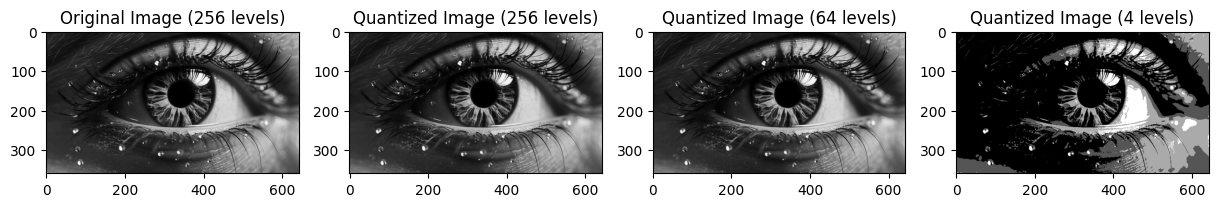

In [3]:
def quantize_image(image, levels):
    """Quantize the image to a given number of intensity levels."""
    return np.floor(image / (256 // levels)) * (256 // levels)

# Quantize images to different levels
quantized_256 = quantize_image(grayscale_image, 256)
quantized_64 = quantize_image(grayscale_image, 64)
quantized_4 = quantize_image(grayscale_image, 4)

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image (256 levels)')
plt.imshow(grayscale_image, cmap='gray')
plt.subplot(1, 4, 2)
plt.title('Quantized Image (256 levels)')
plt.imshow(quantized_256, cmap='gray')
plt.subplot(1, 4, 3)
plt.title('Quantized Image (64 levels)')
plt.imshow(quantized_64, cmap='gray')
plt.subplot(1, 4, 4)
plt.title('Quantized Image (4 levels)')
plt.imshow(quantized_4, cmap='gray')
plt.show()


### 4. Visual and Quantitative Analysis

- **Algorithm**: Plot histograms of pixel values for the original, downsampled, and quantized images.
- **Accuracy**: Provides a visual comparison of pixel distributions.
- **Visualization**: Histogram plots for visual comparison.

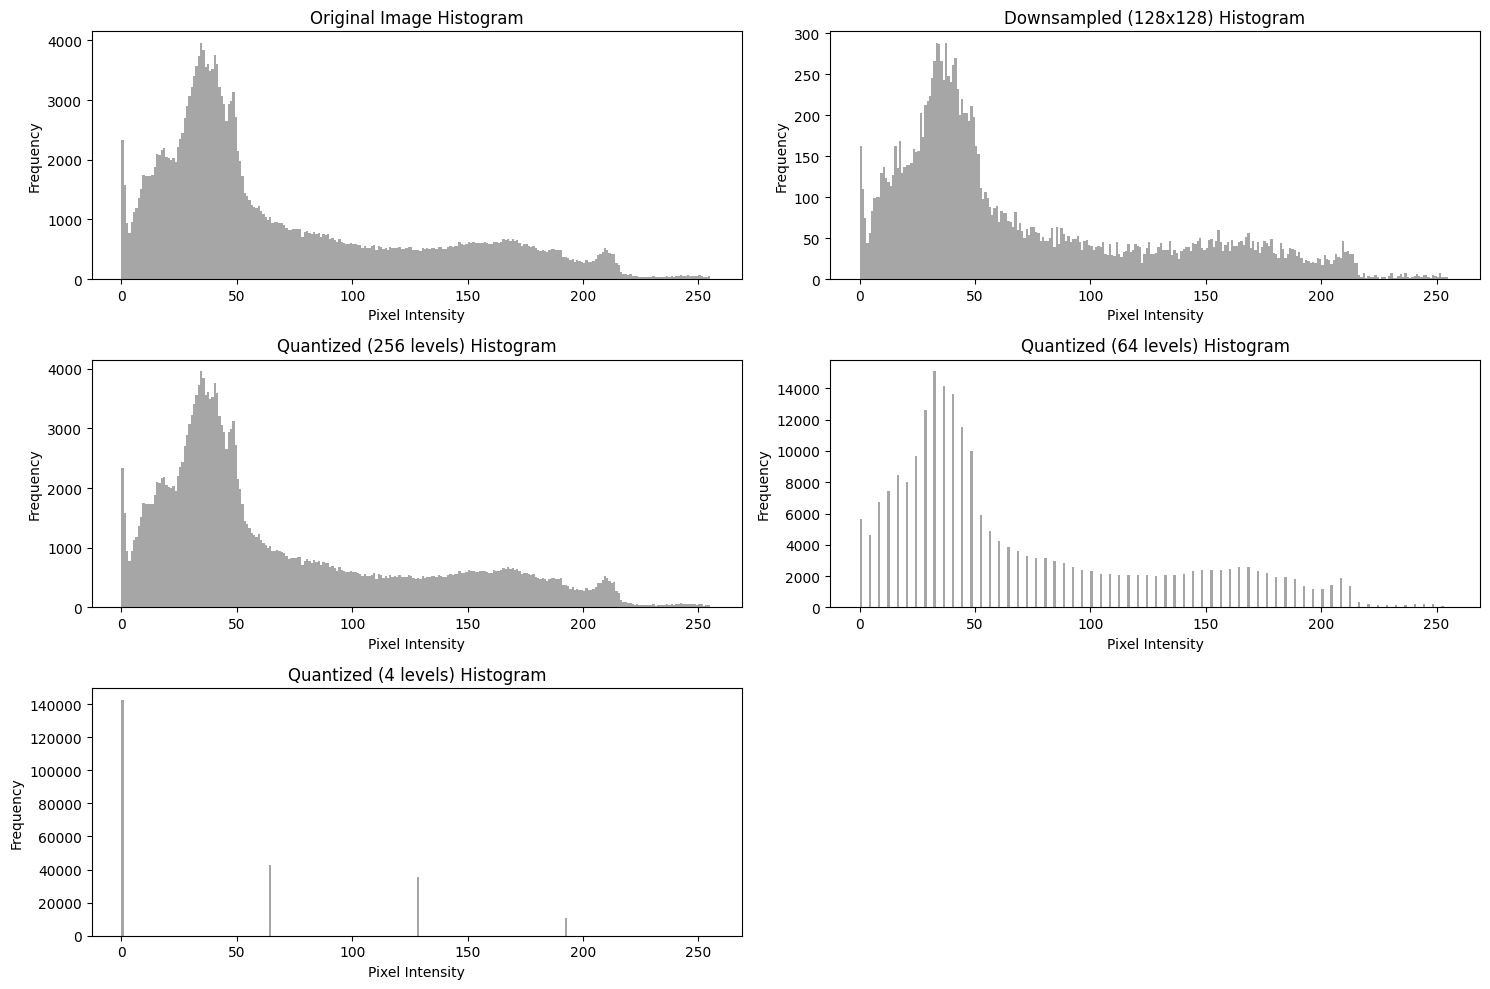

In [4]:
# Function to plot histograms
def plot_histogram(image, title):
    plt.hist(image.flatten(), bins=256, range=[0,256], color='gray', alpha=0.7)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

# Plot histograms
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plot_histogram(grayscale_image, 'Original Image Histogram')

plt.subplot(3, 2, 2)
plot_histogram(downsampled_128, 'Downsampled (128x128) Histogram')

plt.subplot(3, 2, 3)
plot_histogram(quantized_256, 'Quantized (256 levels) Histogram')

plt.subplot(3, 2, 4)
plot_histogram(quantized_64, 'Quantized (64 levels) Histogram')

plt.subplot(3, 2, 5)
plot_histogram(quantized_4, 'Quantized (4 levels) Histogram')

plt.tight_layout()
plt.show()


### 5. Error Metrics

- **Algorithm**: Calculate Mean Squared Error (MSE) between the original image and the downsampled/quantized images.
- **Accuracy**: Quantifies the difference between images.
- **Visualization**: Not applicable; numerical analysis.

In [5]:
from sklearn.metrics import mean_squared_error

# Downsample the original image to 512x512, 256x256, and 128x128 directly
original_512 = cv2.resize(grayscale_image, (512, 512), interpolation=cv2.INTER_NEAREST)
original_256 = cv2.resize(grayscale_image, (256, 256), interpolation=cv2.INTER_NEAREST)
original_128 = cv2.resize(grayscale_image, (128, 128), interpolation=cv2.INTER_NEAREST)

# Calculate MSE for downsampled images against their respective originals
mse_downsampled_512 = mean_squared_error(original_512.flatten(), downsampled_512.flatten())
mse_downsampled_256 = mean_squared_error(original_256.flatten(), downsampled_256.flatten())
mse_downsampled_128 = mean_squared_error(original_128.flatten(), downsampled_128.flatten())

# Calculate MSE for quantized images against the original grayscale image
mse_quantized_256 = mean_squared_error(grayscale_image.flatten(), quantized_256.flatten())
mse_quantized_64 = mean_squared_error(grayscale_image.flatten(), quantized_64.flatten())
mse_quantized_4 = mean_squared_error(grayscale_image.flatten(), quantized_4.flatten())

print(f'MSE for Downsampled 512x512: {mse_downsampled_512}')
print(f'MSE for Downsampled 256x256: {mse_downsampled_256}')
print(f'MSE for Downsampled 128x128: {mse_downsampled_128}')

print(f'MSE for Quantized 256 levels: {mse_quantized_256}')
print(f'MSE for Quantized 64 levels: {mse_quantized_64}')
print(f'MSE for Quantized 4 levels: {mse_quantized_4}')


MSE for Downsampled 512x512: 0.0
MSE for Downsampled 256x256: 0.0
MSE for Downsampled 128x128: 0.0
MSE for Quantized 256 levels: 0.0
MSE for Quantized 64 levels: 3.449585277345775
MSE for Quantized 4 levels: 1216.755097632625


### Interpretation:

- **Downsampling**: As the resolution decreases, fine details are lost, which is reflected in increasing MSE values.
- **Quantization**: Lower quantization levels introduce banding and loss of detail, resulting in higher MSE values.
- **Correlation**: Higher MSE indicates a greater deviation from the original image, correlating with visible quality loss.